In [328]:
# !pip install pandas
# !pip install seaborn
# !pip install statsmodels
# !pip install scikit-learn
# !pip install scipy

In [329]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Работа с датасетом (СТАРОЕ + МУСОР)

In [330]:
data_raw = pd.read_csv('data.csv')

In [331]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995004 entries, 0 to 995003
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   benchmark_id      995004 non-null  object 
 1   benchmark_name    995004 non-null  object 
 2   date_of           995004 non-null  object 
 3   quote             995004 non-null  float64
 4   ctl_loading       995004 non-null  int64  
 5   ctl_loading_date  995004 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 45.5+ MB


In [332]:
len (data_raw.benchmark_id.unique())

516

In [333]:
len (data_raw.benchmark_name.unique())

511

In [334]:
data_raw.head(5)

,benchmark_id,benchmark_name,date_of,quote,ctl_loading,ctl_loading_date
0,00000000-0000-0000-0000-000000000001,Ruonia,2018-04-09,513.893595,38463471715,2018-04-09
1,005F4F7B-D562-4B0F-BDC9-EB892065A955,RUGBITR1Y,2018-04-09,153.916680,38463471715,2018-04-09
2,03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1,50%RUCBITRBB3Y + 50%RUCBITRBBB3Y,2018-04-09,48.649655,38463471715,2018-04-09
3,050C195A-1D74-402F-B36D-63CA40AFE789,60% RUGBITR1Y+40% RUONIA Index,2018-04-09,277.774791,38463471715,2018-04-09
4,050C195A-1D74-402F-B36D-63CA40AFE789,60% RUGBITR1Y+40% RUONIA Index,2018-04-09,277.774791,38463471715,2018-04-09


In [335]:
df_for_roffl = data_raw.groupby(by = ['benchmark_name'])['benchmark_id'].agg(['unique'])
df_for_roffl['len'] = df_for_roffl['unique'].map(len)
df_for_roffl.loc[df_for_roffl['len'] > 1]

,unique,len
benchmark_name,,
34.44%EMB + 20.42%VCIT + 21.31%NOBL + 23.83%GLD,"[0AB1792A-837C-4A1C-9752-06A63057B79E, 295D397...",2
40% EMB + 36% VCIT + 13% NOBL + 11% GLD,"[81CEE985-55AC-4ADE-88AC-6A33BAF41A17, AF25F87...",2
40%RUGBITR3Y+60%RUGBITR1Y,"[2D4EF6CD-7300-4AC6-AD2F-6C7C8738A12F, 098AFF7...",3
Technology Select Sector Index,"[8D8AADAB-A754-4C02-9C81-0E0B4890856B, 51D93A6...",2


## Группировка данных

In [336]:
def getgrouped_df(df, group_col, value_col):
    df2 = df.pivot(columns=group_col, values=[value_col])
    df2.columns = [f"{col[1]}" for col in df2.columns]
    df2['date_of'] = df['date_of']
    df2 = df2.groupby('date_of').min()
    df2.reset_index(inplace=True) 
    df2.set_index('date_of', inplace=True)
    return df2

In [337]:
data = getgrouped_df (data_raw, 'benchmark_id', 'quote')
data

,00000000-0000-0000-0000-000000000001,005F4F7B-D562-4B0F-BDC9-EB892065A955,023BD1D9-8A68-4ED0-9A3C-ED726A4EF8CF,031C5720-6EA0-4D01-9622-D52BBB917D9F,036C8B72-AF6B-42A5-BE73-5DD4EC6B2FB9,03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1,04BEAA55-0009-4C6E-88D2-7CC628D623F0,04F366C8-BD16-4650-BEEB-8266E8241DBE,050C195A-1D74-402F-B36D-63CA40AFE789,0532FCD2-5A26-4ED7-83C1-F482BE949312,...,F7B73BEE-2E70-4069-B38A-397B488A65CD,F846C875-184D-4862-8C0E-5A5D58E4FD20,F8862F06-75B8-4228-AB48-DB8C6D19BC0C,FB32952E-FB8D-4285-A4EC-578632AA5580,FB5DFAD6-CF72-4C1A-B78C-EE42A1D0BFE0,FB659A84-535D-485D-8B6C-3E511B057ABC,FCE411C7-6A5C-4AB3-8626-070844143139,FD11CE27-B1A1-46E4-B6FE-CDDC4006E8CF,FD3C30F6-F7FD-4AD8-94A4-CBBF6734AB62,FDD3894E-BD97-45DB-B236-A2DB271FFFDA
date_of,,,,,,,,,,,,,,,,,,,,,
2018-04-09,513.893595,153.916680,293.910272,436.987241,269.521904,48.649655,355.278729,360.898977,277.774791,63.836133,...,268.446849,NaN,512.882199,60.564115,NaN,390.178334,NaN,118.713494,467.472672,NaN
2018-04-10,510.579046,157.474457,305.293772,450.483250,269.521904,46.954153,355.278729,365.842685,273.444512,60.138527,...,268.446849,NaN,512.882199,60.564115,NaN,370.739733,NaN,118.713494,401.220976,NaN
2018-04-11,544.724538,152.952702,314.469562,433.147525,264.554810,46.954153,355.278729,362.877276,308.503615,65.566924,...,317.162113,NaN,514.576522,60.564115,NaN,369.279435,NaN,115.262805,401.220976,NaN
2018-04-12,610.296457,154.811161,348.940821,433.147525,300.682721,43.365919,379.016032,393.544577,298.749916,66.286486,...,317.162113,NaN,514.576522,60.564115,NaN,369.279435,NaN,111.908815,401.220976,NaN
2018-04-13,581.447156,168.644377,418.868040,432.545267,293.787880,38.243921,379.016032,393.544577,284.645889,66.254663,...,317.949305,NaN,485.216084,60.564115,NaN,378.919846,NaN,111.908815,405.323339,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-11,NaN,NaN,7.330445,1.822860,17.777670,NaN,2.462607,25943.942856,NaN,NaN,...,6.900052,7.114750,196.054978,2.279492,2.477175,43.625910,1344.371486,2.498609,2.427361,191.697563
2024-03-12,NaN,NaN,6.616919,1.822860,15.249225,NaN,2.462607,25461.939394,NaN,NaN,...,6.900052,6.946814,185.255864,2.279492,2.477175,47.519696,1318.929913,2.498609,2.427361,194.411592
2024-03-13,NaN,NaN,6.616919,1.822860,15.249225,NaN,2.462607,25461.939394,NaN,NaN,...,6.900052,7.639006,196.863083,2.279492,2.477175,47.519696,1318.929913,2.498609,2.427361,198.669337


In [338]:
data.index = data.index.map(pd.Timestamp)

In [339]:
data.head(2)

,00000000-0000-0000-0000-000000000001,005F4F7B-D562-4B0F-BDC9-EB892065A955,023BD1D9-8A68-4ED0-9A3C-ED726A4EF8CF,031C5720-6EA0-4D01-9622-D52BBB917D9F,036C8B72-AF6B-42A5-BE73-5DD4EC6B2FB9,03B447D1-2B2D-4AC2-90C1-5DF2935D4FD1,04BEAA55-0009-4C6E-88D2-7CC628D623F0,04F366C8-BD16-4650-BEEB-8266E8241DBE,050C195A-1D74-402F-B36D-63CA40AFE789,0532FCD2-5A26-4ED7-83C1-F482BE949312,...,F7B73BEE-2E70-4069-B38A-397B488A65CD,F846C875-184D-4862-8C0E-5A5D58E4FD20,F8862F06-75B8-4228-AB48-DB8C6D19BC0C,FB32952E-FB8D-4285-A4EC-578632AA5580,FB5DFAD6-CF72-4C1A-B78C-EE42A1D0BFE0,FB659A84-535D-485D-8B6C-3E511B057ABC,FCE411C7-6A5C-4AB3-8626-070844143139,FD11CE27-B1A1-46E4-B6FE-CDDC4006E8CF,FD3C30F6-F7FD-4AD8-94A4-CBBF6734AB62,FDD3894E-BD97-45DB-B236-A2DB271FFFDA
date_of,,,,,,,,,,,,,,,,,,,,,
2018-04-09,513.893595,153.916680,293.910272,436.987241,269.521904,48.649655,355.278729,360.898977,277.774791,63.836133,...,268.446849,NaN,512.882199,60.564115,NaN,390.178334,NaN,118.713494,467.472672,NaN
2018-04-10,510.579046,157.474457,305.293772,450.483250,269.521904,46.954153,355.278729,365.842685,273.444512,60.138527,...,268.446849,NaN,512.882199,60.564115,NaN,370.739733,NaN,118.713494,401.220976,NaN


## Анализ и очистка данных

Распределение числа пропусков в рядах - некоторые из них являются очень разреженными

<AxesSubplot:ylabel='Count'>

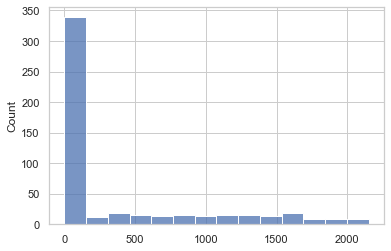

In [340]:
sns.histplot(data.isna().sum(axis=0).to_numpy())

Это связано с тем, что часть данных относятся к старым периодам, а часть наоборот только к новым. Очевидно, что в рамках решения задачи нам не слишком нужны старые ряды - и мы можем спокойно их отбросить.

In [341]:
data_ts_info = pd.DataFrame(index = data.columns)

In [342]:
max_data = []
min_data = []

In [343]:
for i in data.columns:
    data_vspom = data[i].dropna()
    max_data.append(max(data_vspom.index))
    min_data.append(min(data_vspom.index))

В данных наблюдается 55 рядов по которым нет записей за последние 2 года. 

По 92 рядам не передаются посылки 3 марта 15 марта.

## Количество индексов в определенный день

In [344]:
data_real_sum_indexes = pd.read_csv("data.csv", parse_dates=["date_of", "ctl_loading_date"]).groupby(["date_of"]).size()

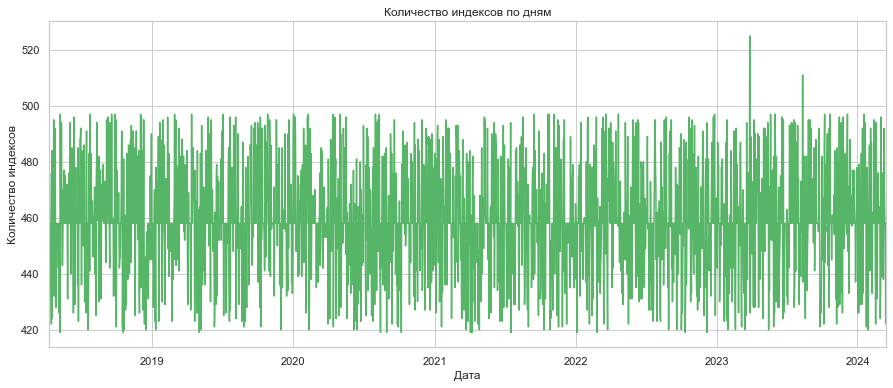

In [418]:
sns.set(style="whitegrid")
plt.figure(figsize = (15, 6))
sns.lineplot(data=data_real_sum_indexes, color = sns.color_palette("Greens")[3])
plt.title('Количество индексов по дням')
plt.xlabel('Дата')
plt.ylabel('Количество индексов')
plt.xlim(data_real_sum_indexes.index[0], data_real_sum_indexes.index[-1])
plt.show()

## Посылки и аномалии

In [347]:
key_column = "agg_quan"

In [348]:
df_loadings = pd.read_csv('loadings.csv', parse_dates=["date_of", "ctl_loading_date"])
df_loadings.columns

Index(['date_of', 'ctl_loading_date', 'quan', 'quan_no_weak_dub',
       'quan_no_dub', 'agg_quan', 'agg_quan_no_week_dub', 'agg_quan_no_dub'],
      dtype='object')

In [349]:
data_as_ts = df_loadings[key_column]
data_as_ts.index = df_loadings['date_of'].map(pd.Timestamp)
data_as_ts = data_as_ts.sort_index()

In [350]:
data_as_ts.tail()

date_of
2024-03-11    467
2024-03-12    458
2024-03-13    458
2024-03-14    422
2024-03-15    458
Name: agg_quan, dtype: int64

<AxesSubplot:xlabel='date_of'>

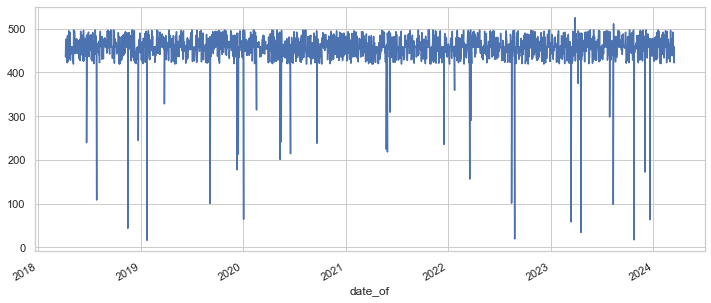

In [351]:
data_as_ts.plot(figsize = (12, 5))

<AxesSubplot:xlabel='date_of'>

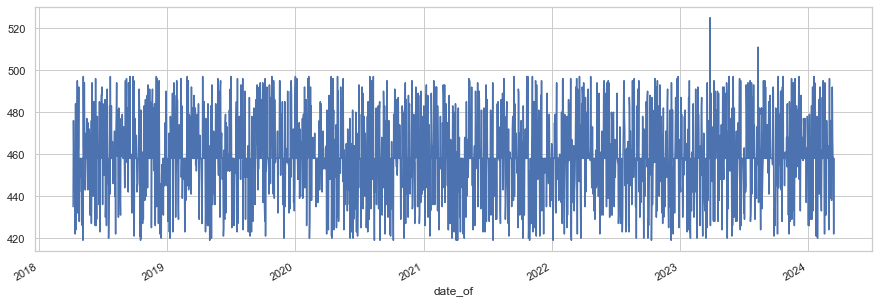

In [352]:
data_as_ts.loc[data_as_ts > 400].plot(figsize = (15, 5))

In [353]:
data_as_ts

date_of
2018-04-09    435
2018-04-10    476
2018-04-11    458
2018-04-12    443
2018-04-13    458
             ... 
2024-03-11    467
2024-03-12    458
2024-03-13    458
2024-03-14    422
2024-03-15    458
Name: agg_quan, Length: 2295, dtype: int64

<AxesSubplot:xlabel='date_of'>

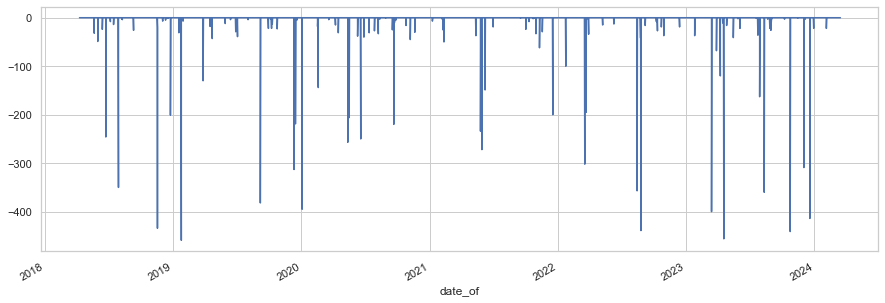

In [354]:
(data_as_ts-data_real_sum_indexes).plot(figsize = (15, 5))

In [355]:
data_anomaly_detection = (data_as_ts-data_real_sum_indexes)

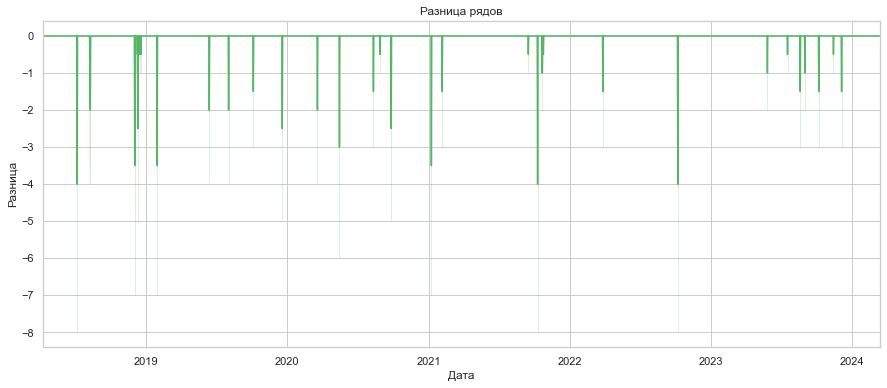

In [435]:
sns.set(style="whitegrid")
plt.figure(figsize = (15, 6))
sns.lineplot(data=data_anomaly_detection.loc[data_anomaly_detection > -10], color = sns.color_palette("Greens")[3])
plt.title('Разница рядов')
plt.xlabel('Дата')
plt.ylabel('Разница')
plt.xlim(data_anomaly_detection.index[0], data_anomaly_detection.index[-1])
plt.show()

In [357]:
df_detection = df_loadings[[key_column,'date_of']]

## Classification

In [358]:
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

In [359]:
df_correlation = df_detection

In [360]:
df_correlation.date_of = df_correlation.date_of.map(pd.Timestamp).apply(lambda x: x.value)/10**9

C:\Users\Максем\AppData\Local\Temp\ipykernel_26460\322975381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_correlation.date_of = df_correlation.date_of.map(pd.Timestamp).apply(lambda x: x.value)/10**9


In [361]:
df_correlation

,agg_quan,date_of
0,456,1.661904e+09
1,450,1.528848e+09
2,458,1.698538e+09
3,471,1.573517e+09
4,463,1.529885e+09
...,...,...
2290,455,1.611878e+09
2291,425,1.542499e+09
2292,451,1.694218e+09
2293,458,1.634602e+09


<AxesSubplot:xlabel='date_of', ylabel='agg_quan'>

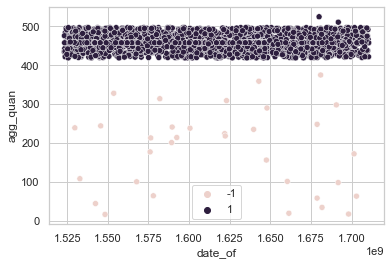

In [427]:
clf = OneClassSVM(nu = 0.02, kernel = 'linear')
data_classes = clf.fit_predict(pd.DataFrame(df_correlation[key_column]))
sns.scatterplot(data=df_correlation, x="date_of", y=key_column, hue = data_classes, color = sns.color_palette("Greens")[:1])

## Train Test Split

In [363]:
data_as_ts_train = data_real_sum_indexes[:-31]
data_as_ts_test = data_real_sum_indexes[len(data_as_ts_train):-1]
data_as_ts_final = data_real_sum_indexes[-1]

## Regression

In [364]:
from statsmodels.tsa import stattools

In [365]:
def check_adf_stat(ts):
  df_stat = stattools.adfuller(ts)
  print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f\ncritical values: %s' %
        (df_stat[0], df_stat[1], df_stat[4]))

  if df_stat[0] > df_stat[4]['5%']:
      print('Есть единичные корни - ряд нестационарный')
  else:
      print('Единичных корней нет, ряд стационарен')

In [366]:
check_adf_stat(data_real_sum_indexes)

The Augmented Dickey-Fuller test statistic -47.385263, 
pvalue: 0.00
critical values: {'1%': -3.4333712566259007, '5%': -2.8628746849930136, '10%': -2.567480519733324}
Единичных корней нет, ряд стационарен


Наблюдаемый нами ряд стационарен

### Autoreg

In [367]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

In [368]:
model = AutoReg(data_as_ts_train, lags = [1, 2, 3, 4, 5, 6, 7, 10, 20, 30, 100, 200, 365], trend='c').fit()
print(model.summary())

c:\Users\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                             AutoReg Model Results                             
Dep. Variable:                       y   No. Observations:                 2137
Model:             Restr. AutoReg(365)   Log Likelihood               -7758.125
Method:                Conditional MLE   S.D. of innovations             19.283
Date:                 Sun, 31 Mar 2024   AIC                          15546.251
Time:                         10:47:02   BIC                          15628.449
Sample:                     04-09-2019   HQIC                         15576.617
                          - 02-13-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        457.8430     39.107     11.707      0.000     381.194     534.492
y.L1          -0.0081      0.024     -0.341      0.733      -0.055       0.038
y.L2           0.0036      0.024      0.152 

c:\Users\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


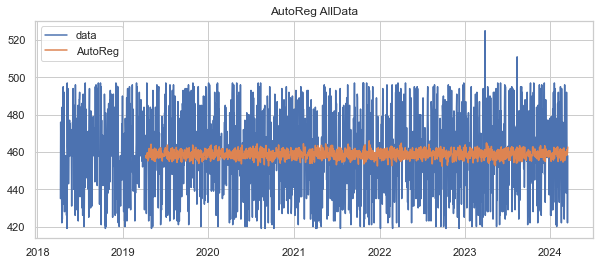

RMSE = 19.294
MAPE = 0.178


In [369]:
y_hat = model.predict(start=0, end=len(data_real_sum_indexes)-1)
plt.figure(figsize=(10,4))
plt.plot(data_real_sum_indexes, label='data')
plt.plot(y_hat, label='AutoReg')
plt.legend(loc='best')
plt.title('AutoReg AllData')
plt.show()
print('RMSE = %.3f' % mean_squared_error(data_real_sum_indexes.values[365:], y_hat[365:]) ** 0.5)
print('MAPE = %.3f' % mean_absolute_percentage_error(data_real_sum_indexes.values[365:], y_hat[365:]) ** 0.5)

c:\Users\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


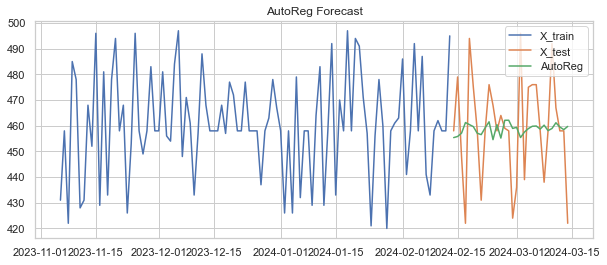

RMSE = 20.226
MAPE = 0.184


In [370]:
y_hat = model.predict(start=len(data_as_ts_train), end=(len(data_as_ts_train)+len(data_as_ts_test)-1))
plt.figure(figsize=(10,4))
plt.plot(data_as_ts_train.index[-100:], data_as_ts_train.values[-100:], label='X_train')
plt.plot(data_as_ts_test.index, data_as_ts_test.values, label='X_test')
plt.plot(data_as_ts_test.index, y_hat, label='AutoReg')
plt.legend(loc='best')
plt.title('AutoReg Forecast')
plt.show()
print('RMSE = %.3f' % mean_squared_error(data_as_ts_test.values, y_hat) ** 0.5)
print('MAPE = %.3f' % mean_absolute_percentage_error(data_as_ts_test.values, y_hat) ** 0.5) 

In [371]:
y_hat_all_TS = model.predict(start=0, end=len(data_real_sum_indexes)-1)

c:\Users\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<AxesSubplot:>

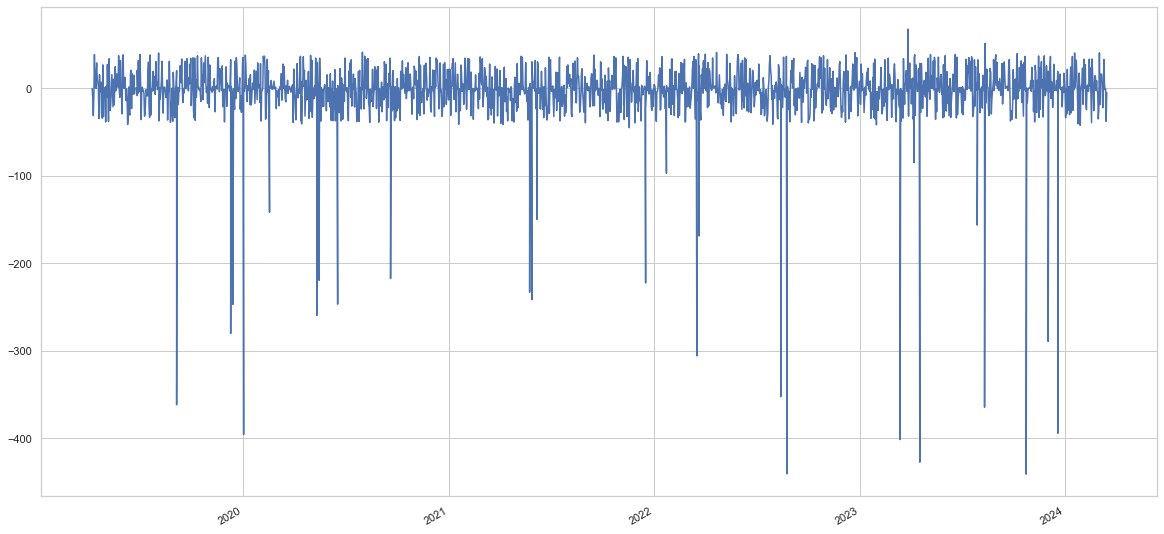

In [372]:
data_anomaly_autoregression = (data_as_ts[365:]-y_hat_all_TS[365:])
data_anomaly_autoregression.plot(figsize = (20, 10))

<AxesSubplot:>

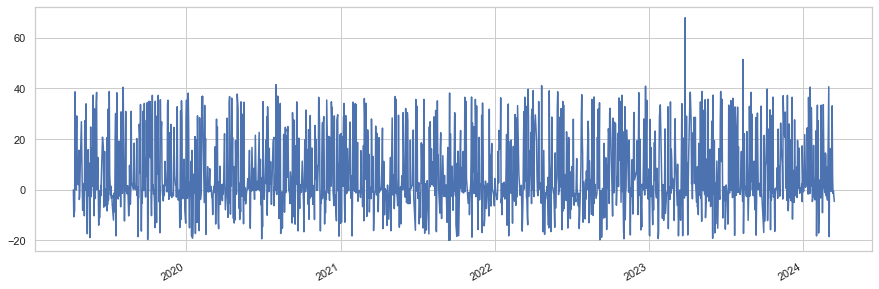

In [373]:
data_anomaly_autoregression.loc[data_anomaly_autoregression > -20].plot(figsize = (15, 5))

In [374]:
data_anomaly_autoregression[22:]

2019-04-09    -0.076697
2019-04-10   -10.730879
2019-04-11   -31.173131
2019-04-12    -8.187079
2019-04-13    38.586686
                ...    
2024-03-11     5.842470
2024-03-12    -1.507099
2024-03-13    -0.478112
2024-03-14   -37.730805
2024-03-15    -4.637748
Length: 1908, dtype: float64

In [375]:
df_num = pd.DataFrame(data_anomaly_autoregression[22:], columns = ['quotes_number'])
df_num ['date_of'] = df_num.index

<AxesSubplot:title={'center':'я'}, xlabel='Дата', ylabel='Количество'>

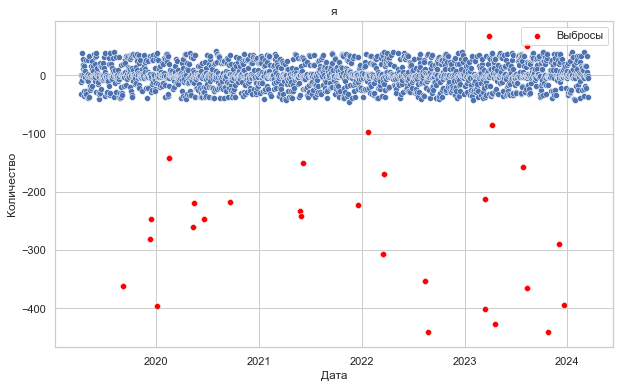

In [376]:
from scipy import stats

plt.figure(figsize=(10, 6))
sns.scatterplot(x='date_of', y='quotes_number', data=df_num)
plt.title('я')
plt.xlabel('Дата')
plt.ylabel('Количество')

z_scores = stats.zscore(df_num['quotes_number'])
threshold = 1.2
outliers = df_num[(z_scores > threshold) | (z_scores < -threshold)]

# Отмечаем выбросы на графике
sns.scatterplot(x='date_of', y='quotes_number', data=outliers, color='red', label='Выбросы')

# Pipeline + Гипотеза (НОВОЕ)

## Гипотеза

Это - количество бенчмарков на определенный день, которые имеются в данных нашей совокупности временных рядов.

<AxesSubplot:xlabel='date_of'>

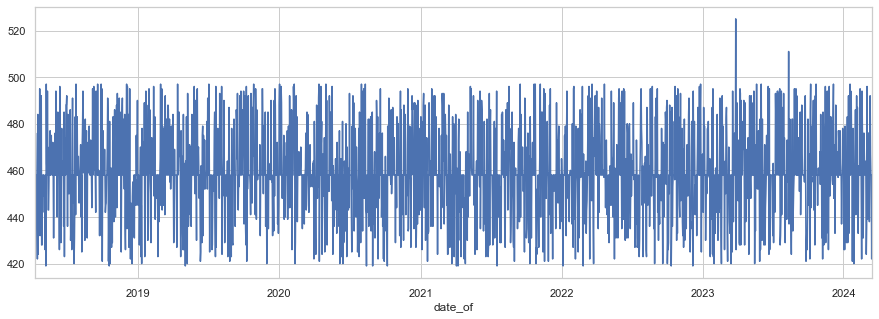

In [377]:
data_real_sum_indexes = pd.read_csv("data.csv", parse_dates=["date_of", "ctl_loading_date"]).groupby(["date_of"]).size()
data_real_sum_indexes.plot(figsize = (15, 5))

В данном ряду не наблюдается визуальных выбросов, значения распределены близко к нормальному. Более того, этот ряд является стационарным, что будет важно при обучении регрессионных моделей.

In [378]:
def check_adf_stat(ts):
  df_stat = stattools.adfuller(ts)
  print('The Augmented Dickey-Fuller test statistic %f, \npvalue: %.2f\ncritical values: %s' %
        (df_stat[0], df_stat[1], df_stat[4]))

  if df_stat[0] > df_stat[4]['5%']:
      print('Есть единичные корни - ряд нестационарный')
  else:
      print('Единичных корней нет, ряд стационарен')

check_adf_stat(data_real_sum_indexes)

The Augmented Dickey-Fuller test statistic -47.385263, 
pvalue: 0.00
critical values: {'1%': -3.4333712566259007, '5%': -2.8628746849930136, '10%': -2.567480519733324}
Единичных корней нет, ряд стационарен


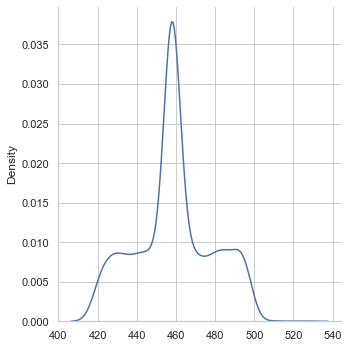

In [379]:
sns.displot(data=data_real_sum_indexes, kind="kde")

А этот ряд - количество бенчмарков в посылке, соответствующий тому или иному дню индексов внутри неё.

В день, когда приходило несколько небольших пакетов с индексами бралось максимальное значение из них - так как это не соответствует стандартной работе системы и скорее всего может рассматриваться как аномалия

<AxesSubplot:xlabel='date_of'>

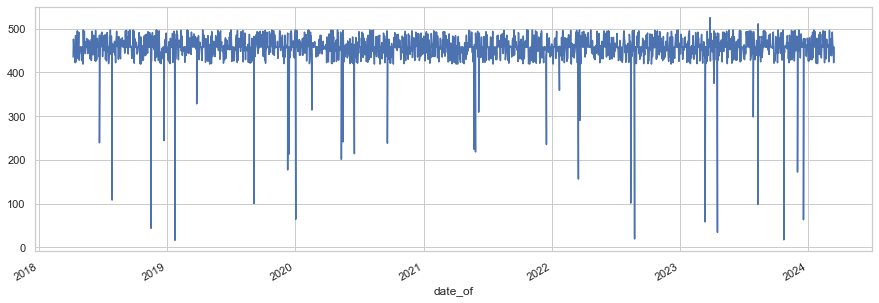

In [380]:
data_as_ts = df_loadings[key_column]
data_as_ts.index = df_loadings['date_of'].map(pd.Timestamp)
data_as_ts = data_as_ts.sort_index()
#data_as_ts = data_as_ts.groupby(data_as_ts.index).min().reset_index()
#data_as_ts.set_index("date_of", inplace=True)
data_as_ts.plot(figsize = (15, 5))

Внутри ряда заметны очевидные выбросы. Ещё более они заметны если посмотреть на распределение ряда:

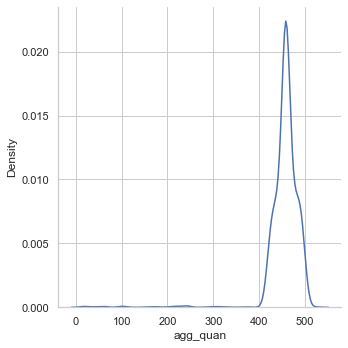

In [381]:
sns.displot(data=data_as_ts, kind="kde")

Но данные выбросы можно сделать ещё более заметными. Так, мы можем заметить, что в целом данные ряды кореллируют между собой:

In [382]:
import statistics

#R1 = statistics.correlation(data_as_ts.values, data_real_sum_indexes.values)
#print (f'R1 = {R1}, R2 = {R1**2}')

А если мы вычтем их друг из друга, то аномалии станут максимально заметны как на графике временного ряда, так и на графике распределения:

<AxesSubplot:xlabel='date_of'>

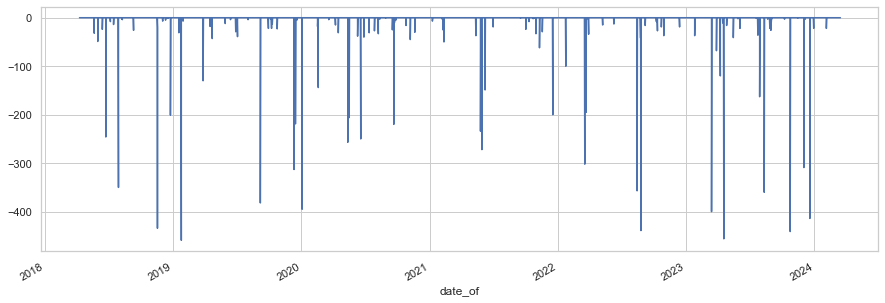

In [383]:
data_anomaly_detection = (data_as_ts - data_real_sum_indexes)
data_anomaly_detection.plot(figsize = (15, 5))

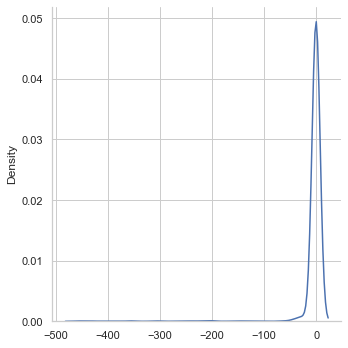

In [384]:
sns.displot(data=data_anomaly_detection, kind="kde")

#### Наша гипотеза заключается в следующем:

1. Данные по количеству бенчмарков на определенный день, которые имеются в данных нашей совокупности временных рядов являются стационарным рядом, который можно легко прогнозировать и на будущие периоды.
2. Разница между значениями ряда бенчмарков на определенный день и количеством бенчмарков в посылке, соответствующей определенному дню, является величиной, которая однозначно позволяет выявить аномалию статистическими методами.

#### Таким образом, наше решение в рамках данной гипотезы будет состоять из следующих элементов:

1. Регрессионная модель для предсказания количества бенчмарков в посылке на определенный день.
2. Модель классификации аномалий, позволяющая оценить "нормальность" посылки по отклонению количества бенчмарков внутри неё от прогноза регрессионной модели.

## Регрессионная модель

### Train test split

Разобьем данные на тренировочные, тестовые и финальный прогноз на 15 число.

In [385]:
data_train = data_real_sum_indexes[:-31]
data_test = data_real_sum_indexes[len(data_as_ts_train):-1]
data_final = data_real_sum_indexes[-1]

### Обучение модели

В качестве архитектуры будем использовать авторегрессионную модель с константным трендом, так как ряд является стационарным.

In [386]:
model = AutoReg(data_train, lags = [1, 2, 3, 4, 5, 6, 7, 10, 20, 30, 100, 200, 365], trend='c').fit()
print(model.summary())

c:\Users\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                             AutoReg Model Results                             
Dep. Variable:                       y   No. Observations:                 2137
Model:             Restr. AutoReg(365)   Log Likelihood               -7758.125
Method:                Conditional MLE   S.D. of innovations             19.283
Date:                 Sun, 31 Mar 2024   AIC                          15546.251
Time:                         10:47:09   BIC                          15628.449
Sample:                     04-09-2019   HQIC                         15576.617
                          - 02-13-2024                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        457.8430     39.107     11.707      0.000     381.194     534.492
y.L1          -0.0081      0.024     -0.341      0.733      -0.055       0.038
y.L2           0.0036      0.024      0.152 

Параметры модели

In [387]:
model.params

const     457.842964
y.L1       -0.008090
y.L2        0.003597
y.L3        0.003208
y.L4       -0.028543
y.L5       -0.007948
y.L6        0.051609
y.L7        0.019792
y.L10       0.005892
y.L20      -0.058242
y.L30      -0.007700
y.L100      0.067695
y.L200     -0.011405
y.L365     -0.027850
dtype: float64

### Прогнозы модели

c:\Users\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


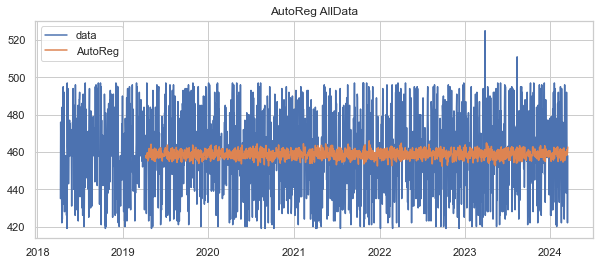

МЕТРИКИ:
RMSE = 19.294
MAPE = 0.178


In [388]:
y_hat = model.predict(start=0, end=len(data_real_sum_indexes)-1)
plt.figure(figsize=(10,4))
plt.plot(data_real_sum_indexes.index, data_real_sum_indexes.values, label='data')
plt.plot(data_real_sum_indexes.index, y_hat, label='AutoReg')
plt.legend(loc='best')
plt.title('AutoReg AllData')
plt.show()
print('МЕТРИКИ:')
print('RMSE = %.3f' % mean_squared_error(data_real_sum_indexes.values[365:], y_hat[365:]) ** 0.5)
print('MAPE = %.3f' % mean_absolute_percentage_error(data_real_sum_indexes.values[365:], y_hat[365:]) ** 0.5)

c:\Users\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


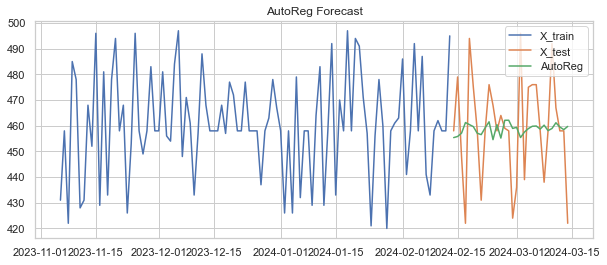

RMSE = 20.226
MAPE = 0.184


In [389]:
y_hat = model.predict(start=len(data_train), end=(len(data_train)+len(data_test)-1))
plt.figure(figsize=(10,4))
plt.plot(data_train.index[-100:], data_train.values[-100:], label='X_train')
plt.plot(data_test.index, data_test.values, label='X_test')
plt.plot(data_test.index, y_hat, label='AutoReg')
plt.legend(loc='best')
plt.title('AutoReg Forecast')
plt.show()
print('RMSE = %.3f' % mean_squared_error(data_as_ts_test.values, y_hat) ** 0.5)
print('MAPE = %.3f' % mean_absolute_percentage_error(data_as_ts_test.values, y_hat) ** 0.5) 

## Детекция аномалий

### На всем временном ряду:

c:\Users\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


<AxesSubplot:>

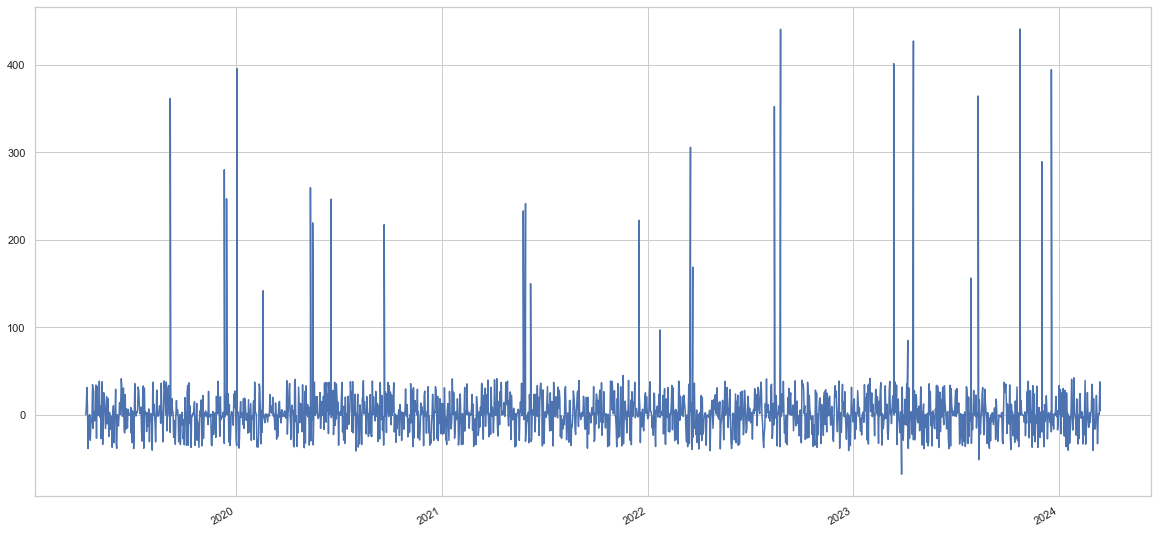

In [390]:
y_hat_all_TS = model.predict(start=0, end=len(data_real_sum_indexes)-1)
data_anomaly_autoregression = (y_hat_all_TS[365:]-data_as_ts[365:])
data_anomaly_autoregression.plot(figsize = (20,10))

#### Z-score

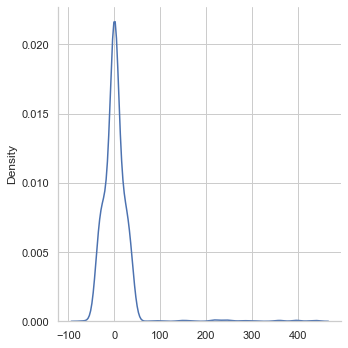

In [391]:
sns.displot(data=data_anomaly_autoregression, kind="kde")

Как мы видим - распределение близко к нормальному. А значит в качестве метрики для "отсечения" аномальных точек" в генеральной совокупности мы можем использовать Z-score точек.

In [392]:
df_num = pd.DataFrame(data_anomaly_autoregression[22:], columns = ['quotes_number'])
df_num ['date_of'] = df_num.index

<AxesSubplot:xlabel='date_of', ylabel='quotes_number'>

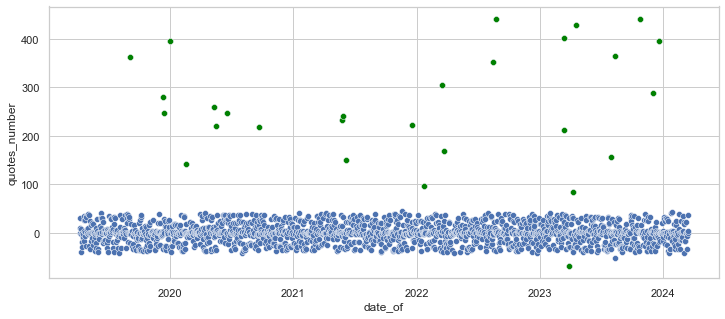

In [431]:
from scipy import stats

plt.figure(figsize=(12, 5))
sns.scatterplot(x='date_of', y='quotes_number', data=df_num)
plt.title('')
plt.xlabel('')
plt.ylabel('')

z_scores = stats.zscore(df_num['quotes_number'])
threshold = 1.8
outliers = df_num[(z_scores > threshold) | (z_scores < -threshold)]

# Отмечаем выбросы на графике
sns.scatterplot(x='date_of', y='quotes_number', data=outliers, color='green')

#### DBSCAN

In [394]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [395]:
dataset = df_num["quotes_number"].reset_index()
dataset["index"] = dataset["index"].astype(np.int64)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1908 entries, 0 to 1907
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1908 non-null   int64  
 1   quotes_number  1908 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 29.9 KB


In [437]:
clusterizator = DBSCAN(min_samples=10).fit(StandardScaler().fit_transform(X=dataset,y=None))
clusterizator.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Text(0, 0.5, 'Количество')

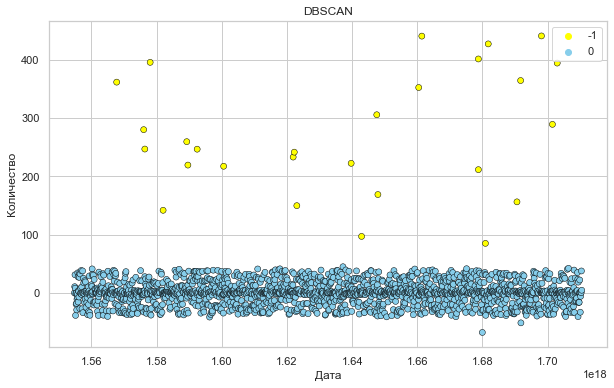

In [440]:
plt.figure(figsize=(10, 6))
palete = ['yellow', 'skyblue']
sns.scatterplot(data=dataset, x="index", y="quotes_number", hue = clusterizator.labels_, palette = palete, edgecolor = 'black')
plt.title('DBSCAN')
plt.xlabel('Дата')
plt.ylabel('Количество')

### На новых данных

Таким образом, для новых данных алгоритм будет работать следующим образом:

1. Принимает на вход пары вида ["дата посылки", "объем посылки"]
2. По дате посылки оценивает ожидаемый объем посылки через авторегрессионную модель
3. Сравнивает разницу между фактическим объемом посылки и ожидаемым объемом посылки с генеральной совокупность, отсекает данные с помощью one class SVM

In [398]:
def predict_labels (data):
    

IndentationError: expected an indented block (2744386986.py, line 2)

In [ ]:
df = pd.read_csv("data.csv", parse_dates=["date_of", "ctl_loading_date"])

date_sz = df.groupby(["date_of"]).size()
date_sz

date_of
2018-04-09    435
2018-04-10    476
2018-04-11    458
2018-04-12    443
2018-04-13    458
             ... 
2024-03-11    467
2024-03-12    458
2024-03-13    458
2024-03-14    422
2024-03-15    458
Length: 2168, dtype: int64